Evolución de los Precios de la Electricidad
===

# Instrucciones

En el archivo `precios.zip`  se encuentran los archivos `Precio_Bolsa_Nacional_($kwh)_ano.xls` en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada realice las siguientes actividades. 

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).

**2.--** Compute e imprima el número de registros con datos faltantes.

**3.--** Compute e imprima el número de registros duplicados.

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

**5.--** Compute y grafique el precio primedio diario.

**6.--** Compute y grafique el precio máximo por mes.

**7.--** Compute y grafique el precio mínimo mensual.

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

---

## Pregunta 1

In [101]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path_input = r"./precios"

In [4]:
archivos_xls = []
for r, d, f in os.walk(path_input):
    for file in f:
        if '.xls' or 'xlsx' in file:
            archivos_xls.append(os.path.join(r, file))

In [5]:
archivos_xls

['./precios/Precio_Bolsa_Nacional_($kwh)_1995.xlsx',
 './precios/Precio_Bolsa_Nacional_($kwh)_1996.xlsx',
 './precios/Precio_Bolsa_Nacional_($kwh)_1997.xlsx',
 './precios/Precio_Bolsa_Nacional_($kwh)_1998.xlsx',
 './precios/Precio_Bolsa_Nacional_($kwh)_1999.xlsx',
 './precios/Precio_Bolsa_Nacional_($kwh)_2000.xlsx',
 './precios/Precio_Bolsa_Nacional_($kwh)_2001.xlsx',
 './precios/Precio_Bolsa_Nacional_($kwh)_2002.xlsx',
 './precios/Precio_Bolsa_Nacional_($kwh)_2003.xlsx',
 './precios/Precio_Bolsa_Nacional_($kwh)_2004.xlsx',
 './precios/Precio_Bolsa_Nacional_($kwh)_2005.xlsx',
 './precios/Precio_Bolsa_Nacional_($kwh)_2006.xlsx',
 './precios/Precio_Bolsa_Nacional_($kwh)_2007.xlsx',
 './precios/Precio_Bolsa_Nacional_($kwh)_2008.xlsx',
 './precios/Precio_Bolsa_Nacional_($kwh)_2009.xlsx',
 './precios/Precio_Bolsa_Nacional_($kwh)_2010.xlsx',
 './precios/Precio_Bolsa_Nacional_($kwh)_2011.xlsx',
 './precios/Precio_Bolsa_Nacional_($kwh)_2012.xlsx',
 './precios/Precio_Bolsa_Nacional_($kwh)_2013.

In [6]:
def read_tablas(file):
    tabla = pd.read_excel(file, header=None)
    tabla = tabla[pd.notnull(tabla.iloc[:,0])]  #elimina filas en blanco
    tabla.loc[:,0] = tabla.loc[:,0].astype(str) #transforma fecha en string
    tabla = tabla[~tabla.loc[:,0].str.contains('Precio')] #ilimina filas con la palabra precio en fecha
    tabla = tabla[~tabla.loc[:,0].str.contains('Fecha')] #ilimina filas con la Fecha
    return tabla

In [7]:
total = pd.DataFrame()
for file in archivos_xls:
    total = total.append(read_tablas(file))
total = total.iloc[:,:-2]  #elimina las ultimas 2 columnas
total.columns = ['Fecha','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20',
                 '21','22','23','24']   

In [8]:
totalF = pd.melt(total,id_vars=['Fecha'])


In [9]:
totalF.rename(columns={'variable': 'hora'}, inplace=True)
totalF.rename(columns={'value': 'Precio'}, inplace=True)


In [10]:
totalF.head()

,Fecha,hora,Precio
0,1995-07-20,1,NaN
1,1995-07-21,1,1.073
2,1995-07-22,1,1.073
3,1995-07-23,1,1.073
4,1995-07-24,1,1


In [11]:
totalF.tail()

,Fecha,hora,Precio
201595,2018-05-01,24,64.2292
201596,2018-05-02,24,67.8328
201597,2018-05-03,24,63.7108
201598,2018-05-04,24,64.0435
201599,2018-05-05,24,75.2429


## Pregunta 2

In [12]:
totalF['Fecha'] = totalF['Fecha'].str.split(' ').str[0]


In [13]:
nulos = totalF[totalF['Precio'].isnull()|totalF['hora'].isnull()|totalF['Fecha'].isnull()]
nulos

,Fecha,hora,Precio
0,1995-07-20,1,NaN
4599,2007-01-11,1,NaN
5336,2009-12-15,1,NaN
6805,2013-12-23,1,NaN
9673,1998-01-03,2,NaN
10061,1999-12-24,2,NaN
10064,1999-12-27,2,NaN
13000,2007-01-12,2,NaN
23607,2013-12-25,3,NaN
25732,1996-12-07,4,NaN


In [14]:
print("Hay un total de {} filas con registros nulos".format(len(nulos)))

Hay un total de 22 filas con registros nulos


## Pregunta 3

In [15]:
duplicados = totalF[totalF.duplicated()]
duplicados

,Fecha,hora,Precio
531,1996-12-06,1,20
532,1996-12-07,1,9.8
533,1996-12-08,1,13.2
534,1996-12-09,1,13
535,1996-12-10,1,12
536,1996-12-11,1,4
537,1996-12-12,1,3
538,1996-01-02,1,10
539,1996-01-03,1,12
540,1996-01-04,1,12.8


In [16]:
print ("hay un total de {} filas duplicadas".format(len(duplicados)))

hay un total de 1759 filas duplicadas


## Pregunta 4
Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [17]:
len(totalF) #total datos

201600

In [18]:
totalF_SD = totalF.drop_duplicates(keep=False, inplace=False)  #eliminando datos duplicados

In [19]:
len(totalF_SD)

198082

In [20]:
totalF_SD = totalF_SD.dropna() #eliminando filas sin datos

In [21]:
len(totalF_SD)

198060

In [22]:
totalF_SD

,Fecha,hora,Precio
1,1995-07-21,1,1.073
2,1995-07-22,1,1.073
3,1995-07-23,1,1.073
4,1995-07-24,1,1
5,1995-07-25,1,0.99
6,1995-07-26,1,0.5
7,1995-07-27,1,0.5
8,1995-07-28,1,0
9,1995-07-29,1,1
10,1995-07-30,1,1.072


## Pregunta 5

Compute y grafique el precio primedio diario

In [23]:
#totalF_SD['Precio'].mean()

In [24]:
totalF_SD['Precio'] = totalF_SD['Precio'].astype(float)

In [25]:
totalF_SD['Fecha'] = pd.to_datetime(totalF_SD['Fecha'])

In [26]:
prom_diario = totalF_SD.groupby('Fecha')['Precio'].mean().reset_index().rename(
    columns={'Fecha':'Fecha','Precio' : 'Precio_Prom_Dia'})

In [27]:
#totalF_SD

In [28]:
prom_diario

,Fecha,Precio_Prom_Dia
0,1995-07-20,1.409435
1,1995-07-21,4.924333
2,1995-07-22,1.269500
3,1995-07-23,0.953083
4,1995-07-24,4.305917
5,1995-07-25,1.149167
6,1995-07-26,1.108625
7,1995-07-27,0.585958
8,1995-07-28,0.499792
9,1995-07-29,0.927667


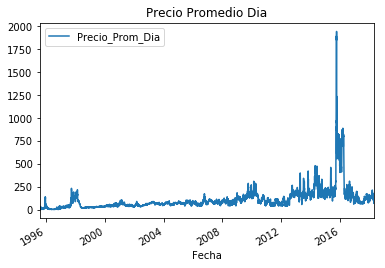

In [29]:
prom_diario.plot(x='Fecha', y='Precio_Prom_Dia', title='Precio Promedio Dia')

## Pregunta 6

Compute y grafique el precio máximo por mes.

### caso 1:  Calculo de precio maximo por mes sin discriminar año

In [30]:
max_mes = totalF_SD.groupby(totalF_SD['Fecha'].dt.month)['Precio'].max()
max_mes

Fecha
1      865.477082
2      869.442024
3      884.836657
4      807.500399
5      686.494571
6      474.110743
7      445.329386
8      441.242919
9     1495.042973
10    2821.520551
11     823.069323
12     840.227945
Name: Precio, dtype: float64

### caso2: calculo de precio maximo mensual incluyeno año

In [31]:
max_mes1 = totalF_SD['Precio'].groupby([totalF_SD['Fecha'].dt.year.rename('Ano'), totalF_SD['Fecha'].dt.month.rename('Mes')]).agg({'max'})
max_mes1

max
Ano  Mes            
1995 7     22.500000
     8     40.000000
     9     40.572000
     10    33.700000
     11   111.907000
     12   179.730000
1996 1     50.000000
     2     75.000000
     3     15.514000
     4     18.000000
     5     21.071000
     6     20.200000
     7     23.258000
     8     28.000000
     9     28.000000
     10    30.000000
     11   122.674000
     12    46.000000
1997 1     37.580270
     2     51.494800
     3     59.243940
     4     48.101270
     5     55.130430
     6     57.946830
     7     94.238310
     8    114.944080
     9    273.376400
     10   208.171070
     11   221.487200
     12   215.468750
...              ...
2015 12   840.227945
2016 1    865.477082
     2    869.442024
     3    884.836657
     4    807.500399
     5    311.488075
     6    305.465070
     7    202.134504
     8    324.063225
     9    306.880151
     10   304.447355
     11   278.132200
     12   301.554222
2017 1    225.060730
     2    383.453672
     3    375.000537
     4    165.550082
     5    265.038764
     6    129.409095
     7    143.180645
     8    155.303543
     9    193.644771
     10   206.118792
     11   198.148011
     12   187.216608
2018 1    163.239873
     2    188.179295
     3    244.285131
     4    206.128662
     5     86.229226

[275 rows x 1 columns]

In [32]:
max_mes1.dtypes

max    float64
dtype: object

In [33]:
max_mes1.shape

(275, 1)

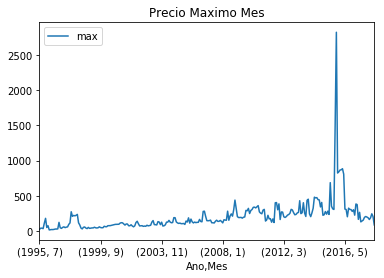

In [34]:
max_mes1.plot(y='max', title='Precio Maximo Mes')

### Otro Método

Primero: cambiar el indice del dataframe para que sea la fecha

In [35]:
totalF_SD1 = totalF_SD.set_index('Fecha')

In [36]:
max_mes2 = totalF_SD1['Precio'].resample('M').max()

In [37]:
max_mes2.rename('Precio_Maximo_Mes')

Fecha
1995-07-31     22.500000
1995-08-31     40.000000
1995-09-30     40.572000
1995-10-31     33.700000
1995-11-30    111.907000
1995-12-31    179.730000
1996-01-31     50.000000
1996-02-29     75.000000
1996-03-31     15.514000
1996-04-30     18.000000
1996-05-31     21.071000
1996-06-30     20.200000
1996-07-31     23.258000
1996-08-31     28.000000
1996-09-30     28.000000
1996-10-31     30.000000
1996-11-30    122.674000
1996-12-31     46.000000
1997-01-31     37.580270
1997-02-28     51.494800
1997-03-31     59.243940
1997-04-30     48.101270
1997-05-31     55.130430
1997-06-30     57.946830
1997-07-31     94.238310
1997-08-31    114.944080
1997-09-30    273.376400
1997-10-31    208.171070
1997-11-30    221.487200
1997-12-31    215.468750
                 ...    
2015-12-31    840.227945
2016-01-31    865.477082
2016-02-29    869.442024
2016-03-31    884.836657
2016-04-30    807.500399
2016-05-31    311.488075
2016-06-30    305.465070
2016-07-31    202.134504
2016-08-31    324.0

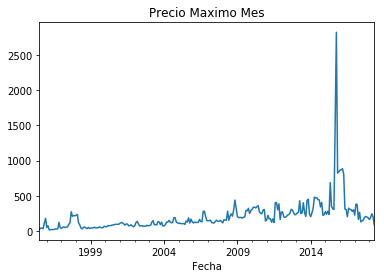

In [38]:
max_mes2.plot(title='Precio Maximo Mes')

## Pregunta 7

Compute y grafique el precio mínimo mensual.

In [39]:
min_mes = totalF_SD1['Precio'].resample('M').min()

In [40]:
min_mes.rename('Precio_Minimo_Mes')

Fecha
1995-07-31      0.000000
1995-08-31      0.000000
1995-09-30      1.073000
1995-10-31      0.000000
1995-11-30      1.072000
1995-12-31      1.074000
1996-01-31      1.073000
1996-02-29      1.076000
1996-03-31      1.255000
1996-04-30      1.254000
1996-05-31      0.000000
1996-06-30      0.000000
1996-07-31      0.000000
1996-08-31      1.253000
1996-09-30      1.260000
1996-10-31      1.255000
1996-11-30      1.254000
1996-12-31      1.256000
1997-01-31     12.221270
1997-02-28     13.989800
1997-03-31     13.231940
1997-04-30     13.401270
1997-05-31     13.927430
1997-06-30     17.446830
1997-07-31     10.882310
1997-08-31     15.944080
1997-09-30     30.376400
1997-10-31     40.171070
1997-11-30     19.014200
1997-12-31     50.496750
                 ...    
2015-12-31    291.104174
2016-01-31    193.967675
2016-02-29    328.571024
2016-03-31    359.955533
2016-04-30    144.833302
2016-05-31    102.999095
2016-06-30     87.969842
2016-07-31     66.009542
2016-08-31     62.0

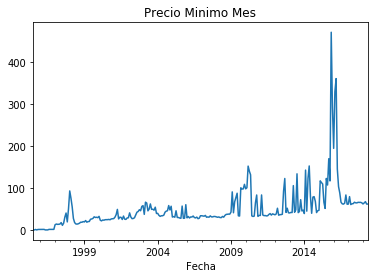

In [41]:
min_mes.plot(title='Precio Minimo Mes')

## Pregunta 8

Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

In [42]:
tabla_max_min_mes = pd.DataFrame(columns = ['Max_Mes', 'Min_Mes'])


In [43]:
tabla_max_min_mes['Max_Mes'] = max_mes2

tabla_max_min_mes['Min_Mes'] = min_mes

In [44]:
tabla_max_min_mes

,Max_Mes,Min_Mes
Fecha,,
1995-07-31,22.500000,0.000000
1995-08-31,40.000000,0.000000
1995-09-30,40.572000,1.073000
1995-10-31,33.700000,0.000000
1995-11-30,111.907000,1.072000
1995-12-31,179.730000,1.074000
1996-01-31,50.000000,1.073000
1996-02-29,75.000000,1.076000
1996-03-31,15.514000,1.255000


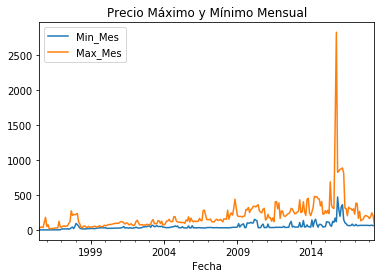

In [45]:
tabla_max_min_mes.plot(y=["Min_Mes", "Max_Mes"], title='Precio Máximo y Mínimo Mensual')

## Pregunta 9

Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

Se etiquetan las fechas con el día de la semana

In [83]:
totalF_SD['day_of_week'] = totalF_SD['Fecha'].dt.day_name()

In [84]:
totalF_SD.head()

,Fecha,hora,Precio,day_of_week
1,1995-07-21,1,1.073,Friday
2,1995-07-22,1,1.073,Saturday
3,1995-07-23,1,1.073,Sunday
4,1995-07-24,1,1.000,Monday
5,1995-07-25,1,0.990,Tuesday


Se filtra el dataframe para eliminar sabados y domingos

In [48]:
tablaDOW = totalF_SD[~(totalF_SD['day_of_week']=='Saturday')]
tablaDOW = tablaDOW[~(tablaDOW['day_of_week']=='Sunday')]

In [85]:
tablaDOW['hora'] = tablaDOW['hora'].astype(int)

In [86]:
tablaDOW.sort_values(by=['Fecha','hora']).reset_index()

,index,Fecha,hora,Precio,day_of_week
0,8400,1995-07-20,2,1.073000,Thursday
1,16800,1995-07-20,3,1.073000,Thursday
2,25200,1995-07-20,4,1.073000,Thursday
3,33600,1995-07-20,5,1.073000,Thursday
4,42000,1995-07-20,6,1.073000,Thursday
5,50400,1995-07-20,7,1.073000,Thursday
6,58800,1995-07-20,8,1.073000,Thursday
7,67200,1995-07-20,9,1.074000,Thursday
8,75600,1995-07-20,10,1.074000,Thursday
9,84000,1995-07-20,11,2.827000,Thursday


In [94]:
max_dow = tablaDOW.groupby(['Fecha'], as_index=False)['Precio'].max()

In [104]:
max_dow.head()

,Fecha,Precio
0,1995-07-20,2.827
1,1995-07-21,16.670
2,1995-07-24,22.500
3,1995-07-25,1.500
4,1995-07-26,8.000


In [96]:
lista = tablaDOW.loc[tablaDOW.groupby('Fecha')['Precio'].idxmax()]

In [75]:
#pd.pivot_table(tablaDOW,index=["Fecha","hora"],values=["Precio"],aggfunc=[np.max])

In [98]:
lista.head(10)

,Fecha,hora,Precio,day_of_week
84000,1995-07-20,11,2.827,Thursday
159601,1995-07-21,20,16.670,Friday
159604,1995-07-24,20,22.500,Monday
159605,1995-07-25,20,1.500,Tuesday
159606,1995-07-26,20,8.000,Wednesday
159607,1995-07-27,20,1.500,Thursday
84008,1995-07-28,11,1.073,Friday
159611,1995-07-31,20,8.845,Monday
75612,1995-08-01,10,17.000,Tuesday
50413,1995-08-02,7,1.100,Wednesday


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c02ce1208>]],
      dtype=object)

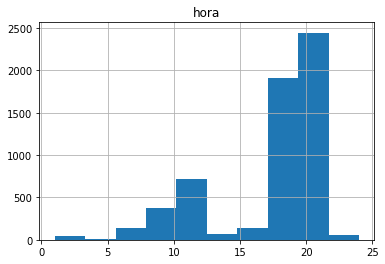

In [107]:
lista.hist(column='hora')

### Segun el histograma de precios por hora en dias laborales, los máximos precios son a las 20 horas

## Pregunta 10

Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado

In [108]:
totalF_SD.head()

,Fecha,hora,Precio,day_of_week
1,1995-07-21,1,1.073,Friday
2,1995-07-22,1,1.073,Saturday
3,1995-07-23,1,1.073,Sunday
4,1995-07-24,1,1.000,Monday
5,1995-07-25,1,0.990,Tuesday


In [109]:
tabla_sab = totalF_SD[(totalF_SD['day_of_week']=='Saturday')]
tabla_sab.head()

,Fecha,hora,Precio,day_of_week
2,1995-07-22,1,1.073,Saturday
9,1995-07-29,1,1.000,Saturday
16,1995-08-05,1,2.000,Saturday
23,1995-08-12,1,30.000,Saturday
30,1995-08-19,1,1.000,Saturday


In [117]:
tabla_sab['hora'] = tabla_sab['hora'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [115]:
lista_sab = tabla_sab.loc[tabla_sab.groupby('Fecha')['Precio'].idxmax()]
lista_sab.head(10)

,Fecha,hora,Precio,day_of_week
159602,1995-07-22,20,2.500,Saturday
100809,1995-07-29,13,1.072,Saturday
58816,1995-08-05,8,2.558,Saturday
67223,1995-08-12,9,40.000,Saturday
184830,1995-08-19,23,2.000,Saturday
159637,1995-08-26,20,2.500,Saturday
159644,1995-09-02,20,24.400,Saturday
50451,1995-09-09,7,15.000,Saturday
58858,1995-09-16,8,15.000,Saturday
58865,1995-09-23,8,15.000,Saturday


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c10981940>]],
      dtype=object)

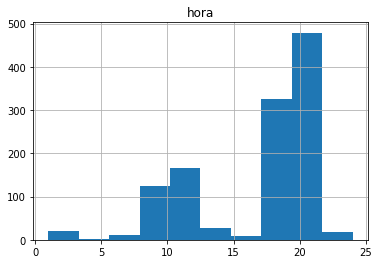

In [116]:
lista_sab.hist(column='hora')

### Segun el histograma de precios por hora los sábados, los maximos precios son a las 20 horas

## Pregunta 11

Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo

In [124]:
tabla_dom = totalF_SD[(totalF_SD['day_of_week']=='Sunday')]
tabla_dom.head()

,Fecha,hora,Precio,day_of_week
3,1995-07-23,1,1.073,Sunday
10,1995-07-30,1,1.072,Sunday
17,1995-08-06,1,3.000,Sunday
24,1995-08-13,1,35.000,Sunday
31,1995-08-20,1,2.000,Sunday


In [125]:
tabla_dom.dtypes

Fecha          datetime64[ns]
hora                   object
Precio                float64
day_of_week            object
dtype: object

In [126]:
tabla_dom['hora'] = tabla_dom['hora'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [127]:
lista_dom = tabla_dom.loc[tabla_dom.groupby('Fecha')['Precio'].idxmax()]
lista_dom.head(10)

,Fecha,hora,Precio,day_of_week
100803,1995-07-23,13,1.238,Sunday
100810,1995-07-30,13,1.073,Sunday
67217,1995-08-06,9,3.200,Sunday
67224,1995-08-13,9,40.000,Sunday
151231,1995-08-20,19,3.100,Sunday
67238,1995-08-27,9,1.075,Sunday
159645,1995-09-03,20,8.400,Sunday
67252,1995-09-10,9,15.000,Sunday
151259,1995-09-17,19,15.000,Sunday
100866,1995-09-24,13,15.000,Sunday


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c03115a20>]],
      dtype=object)

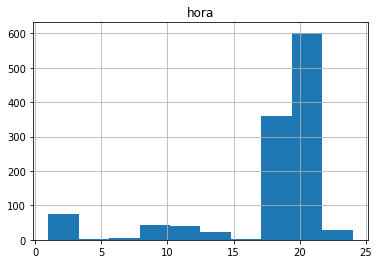

In [128]:
lista_dom.hist(column='hora')

### Segun el histograma de precios por hora los domingos, los maximos precios son a las 20 horas. 

## Pregunta 12

Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [135]:
totalF_SDPp12 = totalF_SD.set_index('Fecha')

In [137]:
totalF_SDPp12.head()

,hora,Precio,day_of_week
Fecha,,,
1995-07-21,1,1.073,Friday
1995-07-22,1,1.073,Saturday
1995-07-23,1,1.073,Sunday
1995-07-24,1,1.000,Monday
1995-07-25,1,0.990,Tuesday


In [138]:
totalF_SDPp12_v1 = totalF_SDPp12['Precio'].resample('Y').min()

In [151]:
totalF_SDPp12_v1

Fecha
1995-12-31     0.000000
1996-12-31     0.000000
1997-12-31    10.882310
1998-12-31    13.847330
1999-12-31    18.359530
2000-12-31    21.531167
2001-12-31    24.822879
2002-12-31    26.777682
2003-12-31    37.013438
2004-12-31    32.252998
2005-12-31    27.581415
2006-12-31    26.714797
2007-12-31    30.173824
2008-12-31    29.199135
2009-12-31    33.033307
2010-12-31    32.024957
2011-12-31    33.291100
2012-12-31    34.988099
2013-12-31    40.415346
2014-12-31    38.941951
2015-12-31    46.791501
2016-12-31    61.100689
2017-12-31    60.312095
2018-12-31    61.457224
Freq: A-DEC, Name: Precio, dtype: float64

Pero se quiere conserva la fecha, entonces la solución sería

In [150]:
totalF_SD['year'] = totalF_SD['Fecha'].dt.year
totalF_SD.head()

,Fecha,hora,Precio,day_of_week,year
1,1995-07-21,1,1.073,Friday,1995
2,1995-07-22,1,1.073,Saturday,1995
3,1995-07-23,1,1.073,Sunday,1995
4,1995-07-24,1,1.000,Monday,1995
5,1995-07-25,1,0.990,Tuesday,1995


In [148]:
min_año = totalF_SD.loc[totalF_SD.groupby('year')['Precio'].idxmin()]
min_año

,Fecha,hora,Precio,day_of_week,year
8,1995-07-28,1,0.000000,Friday,1995
346,1996-06-30,1,0.000000,Sunday,1996
17538,1997-07-15,3,10.882310,Tuesday,1997
1100,1998-07-12,1,13.847330,Sunday,1998
51781,1999-03-28,7,18.359530,Sunday,1999
52153,2000-03-25,7,21.531167,Saturday,2000
27466,2001-08-20,4,24.822879,Monday,2001
2518,2002-04-29,1,26.777682,Monday,2002
2809,2003-02-14,1,37.013438,Friday,2003
11618,2004-03-29,2,32.252998,Monday,2004


## Pregunta 13

Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

In [153]:
totalF_SD.head()

,Fecha,hora,Precio,day_of_week,year
1,1995-07-21,1,1.073,Friday,1995
2,1995-07-22,1,1.073,Saturday,1995
3,1995-07-23,1,1.073,Sunday,1995
4,1995-07-24,1,1.000,Monday,1995
5,1995-07-25,1,0.990,Tuesday,1995


In [154]:
tabla_temp = totalF_SD.set_index('Fecha')
tabla_temp.head()

,hora,Precio,day_of_week,year
Fecha,,,,
1995-07-21,1,1.073,Friday,1995
1995-07-22,1,1.073,Saturday,1995
1995-07-23,1,1.073,Sunday,1995
1995-07-24,1,1.000,Monday,1995
1995-07-25,1,0.990,Tuesday,1995


In [155]:
ts = tabla_temp['Precio']
ts.head()

Fecha
1995-07-21    1.073
1995-07-22    1.073
1995-07-23    1.073
1995-07-24    1.000
1995-07-25    0.990
Name: Precio, dtype: float64

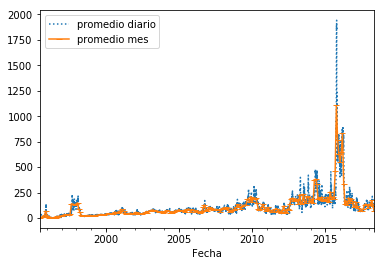

In [161]:
#ts.plot(style='-')
ts.resample('D').mean().plot(style=':')
ts.resample('M').mean().plot(style='-_')
plt.legend(['promedio diario','promedio mes'])